In [45]:
from google.colab import drive

In [46]:
from time import time

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [47]:
imagef = torchvision.datasets.ImageFolder('/content/drive/MyDrive/Mask Off/datasets_cv',transform = transforms.ToTensor());
data_loader = DataLoader(imagef,batch_size=30)

In [48]:
for img,label in data_loader:
    print(img.shape)
    break

torch.Size([30, 3, 128, 128])


# Normalize Data

In [49]:
# This one takes a while
all_im = []
for i in range(len(imagef)):
    all_im = all_im + [imagef[i][0]]


Streaming output truncated to the last 5000 lines.
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
3

In [50]:
all_im = torch.stack(all_im)

In [51]:
chan0 = all_im[:,0,:,:]
chan1 = all_im[:,1,:,:]
chan2 = all_im[:,2,:,:]
chan0_mean = chan0.mean()
print("Chan0 mean is:", chan0_mean)
chan1_mean = chan1.mean()
print("Chan1 mean is:", chan1_mean)
chan2_mean = chan2.mean()
print("Chan2 mean is:", chan2_mean)
chan0_std = chan0.std()
print("Chan0 std is:", chan0_std)
chan1_std = chan1.std()
print("Chan1 std is:", chan1_std)
chan2_std = chan2.std()
print("Chan2 std is:", chan2_std)

means = [chan0_mean,chan1_mean,chan2_mean]
stds = [chan0_std,chan1_std,chan2_std]

Chan0 mean is: tensor(0.4975)
Chan1 mean is: tensor(0.4310)
Chan2 mean is: tensor(0.3986)
Chan0 std is: tensor(0.2761)
Chan1 std is: tensor(0.2610)
Chan2 std is: tensor(0.2705)


In [52]:
transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize(means,stds)])

fullImages = torchvision.datasets.ImageFolder('/content/drive/MyDrive/Mask Off/datasets_cv', transform = transform)

In [53]:
def ThreeToOneH(argument):
    switcher = {
        0 : [1.0,0.0,0.0],
        1 : [0.0,1.0,0.0],
        2 : [0.0,0.0,1.0],
    }
    return (switcher[argument])

In [54]:
import torch.utils.data as data

class MaskDataSet(data.Dataset):

    def __init__(self,X,y):
        self.X = X
        self.y = y

    def __len__(self):
        return(len(self.X))

    def __getitem__(self,index):
        img = self.X[index]
        label = self.y[index]
        return img,label

In [55]:
start_time = time()

images = []
oh_labels = []
for i in range(len(fullImages)):
    images = images + [fullImages[i][0]]
    oh_labels = oh_labels + [torch.tensor(ThreeToOneH(fullImages[i][1]))]
    if (i%100 == 0):
        print(i)

images = torch.stack(images)
oh_labels = torch.stack(oh_labels)

masked_ds = MaskDataSet(images,oh_labels)

end_time = time()
total_time = end_time - start_time
print("total time: (s)", total_time)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
total time: (s) 29.78681254386902


In [13]:
# Save model (if desired)

torch.save(masked_ds,"masked_v2.pt")


In [67]:
# Check if normalized
data_loader = DataLoader(masked_ds,batch_size = 6000)

In [68]:
for img,label in data_loader:
    # Seperate the colour channels
    chan0 = img[:,0,:,:]
    chan1 = img[:,1,:,:]
    chan2 = img[:,2,:,:]
    # Compute mean
    chan0_mean = chan0.mean()
    chan1_mean = chan1.mean()
    chan2_mean = chan2.mean()
    # Compute std.
    chan0_std = chan0.std()
    chan1_std = chan1.std()
    chan2_std = chan2.std()
    print("Chan0 mean is:", chan0_mean)
    print("Chan1 mean is:", chan1_mean)
    print("Chan2 mean is:", chan2_mean)
    print("Chan0 std is:", chan0_std)
    print("Chan1 std is:", chan1_std)
    print("Chan2 std is:", chan2_std)

# Normalized correctly

Chan0 mean is: tensor(-5.5889e-07)
Chan1 mean is: tensor(2.1317e-06)
Chan2 mean is: tensor(2.2921e-07)
Chan0 std is: tensor(1.)
Chan1 std is: tensor(1.)
Chan2 std is: tensor(1.)


In [69]:
# 70,10,20 train,validation,test split
td,tvd,tl,tvl = train_test_split(images,oh_labels,test_size = 0.3,random_state = 0)
vd,testd,vl,testl = train_test_split(tvd,tvl,test_size = float(2/3),random_state = 0)

# Training

In [70]:
import torch.nn as nn

class Baseline(nn.Module):

    def __init__(self):
        super(Baseline,self).__init__()
        self.conv1 = nn.Conv2d(3,10,3)
        self.pool1 = nn.MaxPool2d(2,2,padding = 1)
        self.conv2 = nn.Conv2d(10,5,5)
        self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(5,5,5)
        self.pool3 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(5*13*13,100)
        self.fc2 = nn.Linear(100,3)
    
    def forward(self,x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1,5*13*13)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))

        return x

In [71]:
def load_data(batch_size):
    tds = MaskDataSet(td,tl)
    vds = MaskDataSet(vd,vl)
    train_loader = DataLoader(tds,batch_size = batch_size,shuffle = True)
    val_loader = DataLoader(vds,batch_size = batch_size,shuffle = True)
    return train_loader, val_loader

In [72]:
def load_model(lr):
    model = Baseline()
    loss_fnc = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(),lr = lr)
    return model, loss_fnc, optimizer

In [73]:
def accuracy(predict,label):
    total_corr = 0
    for i in range(len(predict)):
        this_pred = predict[i].detach().numpy()
        this_label = label[i].detach().numpy()
        pred_max = np.argmax(this_pred)

        if (this_label[pred_max] == 1):
            total_corr = total_corr + 1
    
    return (total_corr/len(predict))

In [74]:
def evaluate(model,val_loader):
    total_corr = 0
    total = 0
    nbatch = 0
    total_loss = 0

    for img,label in val_loader:
        if (nbatch+1 == len(val_loader)):
            break
        predict = model(img)
        loss = loss_fnc(input = predict,target = label)
        total_loss = total_loss + loss.item()
        total_corr = total_corr + accuracy(predict,label)*len(predict)
        total = total + len(predict)
        nbatch = nbatch + 1
    
    return float(total_corr/total),float(total_loss/nbatch)

In [77]:
# Hyperparameters
nepochs = 10
lr = 0.1
bs = 30
seed = 0

In [78]:
# Training loop
torch.manual_seed(seed)

# Initialize model, loss_fnc, optimizer
model,loss_fnc,optimizer = load_model(lr)
e = 0

# Initialize data loader
train_iter,val_iter = load_data(bs)

# For plotting
tlossRec = []
templossRec = []
tempaccRec = []
vlossRec = []
taccRec = []
vaccRec = []
eRec = []

# Time
start_time = time()
for i in range(nepochs):
    for img,label in train_iter:
        optimizer.zero_grad()
        predict = model(img)
        loss = loss_fnc(input = predict,target = label)
        loss.backward()
        optimizer.step()
        # Track training loss and accuracy throughout
        templossRec.append(loss.item())
        tempaccRec.append(accuracy(predict,label))
    print(i)

    tlossRec.append(sum(templossRec)/len(templossRec))
    taccRec.append(sum(tempaccRec)/len(tempaccRec))
    model.eval()
    vacc,vloss = evaluate(model,val_iter)
    vaccRec.append(vacc)
    vlossRec.append(vloss)
    model.train()
    eRec.append(e)
    e = e + 1
    templossRec = []
    tempaccRec = []

stop_time = time()
print("Total time:", stop_time-start_time)

0
1
2
3
4
5
6
7
8
9
Total time: 230.4500789642334


In [79]:
print("Final training accuracy: ", taccRec[-1])
print("Final validation accuracy: ", vaccRec[-1])
print("Final training loss: ", tlossRec[-1])
print("Final validation loss: ", vlossRec[-1])

Final training accuracy:  0.9958333333333336
Final validation accuracy:  0.996078431372549
Final training loss:  0.002588717408350938
Final validation loss:  0.002980604736525466


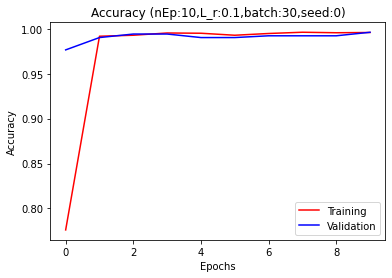

In [80]:
plt.plot(eRec,taccRec,color = 'red')
plt.plot(eRec,vaccRec,color = 'blue')
plt.title('Accuracy (nEp:{},L_r:{},batch:{},seed:{})'.format(nepochs,lr,bs,seed))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'])

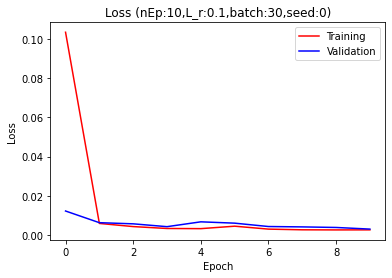

In [81]:
plt.plot(eRec,tlossRec,color = 'red')
plt.plot(eRec,vlossRec,color = 'blue')
plt.title('Loss (nEp:{},L_r:{},batch:{},seed:{})'.format(nepochs,lr,bs,seed))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [82]:
def test_eval(model,loss_fnc,testd,testl):
    total_corr = 0
    total = 0
    total_loss = 0

    for i in range(len(testd)):
        total = total + 1
        predict = model(testd[i].unsqueeze(0))
        label = testl[i]
        if label[np.argmax(predict.detach().numpy())] == 1:
            total_corr = total_corr + 1
        total_loss = total_loss + loss_fnc(predict,label).item()

    return total_corr/total,total_loss/total

In [83]:
testacc,testloss = test_eval(model,loss_fnc,testd,testl)

print("Test accuracy:", testacc,"\n")
print("Test loss:", testloss)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test accuracy: 0.994140625 

Test loss: 0.0027241663664105114


In [84]:
torch.save(model,'baseline_maskless.pt2')

In [89]:
int(masked_ds[i][1][0])

1

In [93]:
masked = 0
for i in range(5117):
    if int(masked_ds[i][1][2] == 1):
        masked = masked + 1
    else:
        pass
print(masked)

2801
